# Task 03: Photovoltaics


## 3.1 The Sandia PV Performance Modelling Collaborative (PVPMC)


<img src="./images/pvpmc2.png" width=1000 />

_Fig.: PV performance modelling steps._ <br> Source: https://pvpmc.sandia.gov/

The US Sandia National Laboratories are renowned for their research and development in renewable energies. They established the PV Performance Modelling Collaborative (PVPMC), a collaboration between industry and national laboratory. The home page of PVPMC is here: https://pvpmc.sandia.gov/

The PVPMC defined 10 steps to assess PV module performance. The above diagram gives you and overview.

Click on the menu item `Modelling Steps`. This opens a new [sub page](https://pvpmc.sandia.gov/modeling-steps/) describing the modelling steps. 

**Get a rough general overview of the first two chapters!**

## 3.2 Irradiance & Insolation (not insulation!)

Read the section [Irradiance & Insolation](https://pvpmc.sandia.gov/modeling-steps/1-weather-design-inputs/irradiance-and-insolation-2/). 

1. How do you get the insolation from the irradiance? What are typcial units of these two quantities?
1. What are normal irradiance, diffuse horizontal irradiance and global horizontal irradiance and how do you measure it?


Irradiance is a measure of solar power whereas insolation is a measure of solar energy. Power is the rate of energy transfer over time (not the total amount of energy delivered), irradiance quantifies the amount of solar energy that arrives in a particular area in a given moment. The unit is Watt/m2.
Insolation is when the value of irradiance is converted to express the total amount of energy that area receives over a certain interval of time, the unit of insolation is in Watt hours (Wh) or kilowatt hours (kWh) per unit of area (k)Wh/m2.

## 3.3 Install pvlib and get an overview about the documentation

The PVPMC provides the comprehensive library `pvlib` for numerical quantitative evaluation of planned PV power plants and support during the design phase. Relevant links are:

* pvlib toolbox home page: https://pvpmc.sandia.gov/applications/pv_lib-toolbox/
* Source code as well as example and tutorial code: https://github.com/pvlib/pvlib-python
* Documentation: https://pvlib-python.readthedocs.io/en/latest/index.html

Execute `conda install -c pvlib pvlib`on the Anaconda prompt. It is highly recommended (but not mandatory) that you create a dedicated conda environment first with all necessary installations (e.g. jupyter, numpy, etc.) and to install pvlib into that isolated environment.

Get an **overview** of the [pvlib software documentation](https://pvlib-python.readthedocs.io/en/latest/index.html) (intro, tutorial, gallery, api reference).

The [API reference](https://pvlib-python.readthedocs.io/en/latest/api.html) provides a list of all functions and classes provided by the toolbox.

1. What does `pvlib.location.Location.get_clearsky()` do?


pvlib.location.Location.get_clearsky() Calculates the clear sky estimates of GHI, DNI, and/or DHI at this location.
(GHI) is the Global Horizontal Irradiance. (DNI) is the Direct Normal Irradiance (DNI), and (DHI) is the Diffuse Horizontal Irradiance.

## 3.4 Plane of Array (POA) Irradiance

Read https://pvpmc.sandia.gov/modeling-steps/1-weather-design-inputs/plane-of-array-poa-irradiance/

When you set up a solar PV generator it usally consists of a set of modules called array. The normal vector (also just called normal) of the array is the direction vector (unit length) perpendicular on the PV module surface. Usually al modules of an PV module array point in the same direction, i.e. have the same normal vector. These parallel PV module surfaces are summarized as the Plane of Array **POA**. The direction of the POA is the direction of each module.

With the clear sky function you get the global irradiance on a horizontal surface **GHI** for a specific location and time under the clear sky assumption, i.e. weather phenomena such as clouds are not taken into account.

The GHI can be roughly estimated by means of the clear sky function. It then has to be transformed to irradiance collected by tilted modules with a given POA. The pylib documentation shows an example how to perform the transformation from GHI to the POA irradiance: https://pvlib-python.readthedocs.io/en/latest/auto_examples/plot_ghi_transposition.html#sphx-glr-auto-examples-plot-ghi-transposition-py

Calculate the POA irradiance for modules in the garden of the Green Fablab Kamp-Lintfort for the year 2020! Modify the above example code. Use three dates: summer solstice, winter solstice and spring equinoxe. The modules are tilted by 60° and pointing not exactly south but precisely south-west (SW) direction. 

Plot all three cases in three subplots. (The example code above uses two subplots). 

Now let the modules be tilted by 30° and redo the calulation. What do observe when you compare the two tilt angles? Why are the POA curves asymmetric? Which tilt angle is "better"? Discuss. 


**Answers**

Garden of Green Fablab coordinates: 51.497924620868794, 6.549052873780264

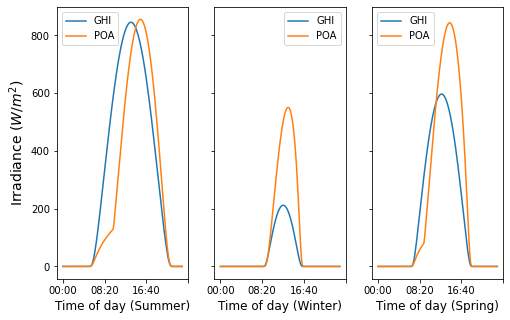

In [3]:
from pvlib import location
from pvlib import irradiance
import pandas as pd
from matplotlib import pyplot as plt

# For this example, we will be using Green Fablab, Kamp-Lintfort
tz = 'CET'
lat, lon = 51.497, 6.549

# Create location object to store lat, lon, timezone
site = location.Location(lat, lon, tz=tz)


# Calculate clear-sky GHI and transpose to plane of array
# Define a function so that we can re-use the sequence of operations with
# different locations
def get_irradiance(site_location, date, tilt, surface_azimuth):
    # Creates one day's worth of 10 min intervals
    times = pd.date_range(date, freq='10min', periods=6*24,
                          tz=site_location.tz)
    # Generate clearsky data using the Ineichen model, which is the default
    # The get_clearsky method returns a dataframe with values for GHI, DNI,
    # and DHI
    clearsky = site_location.get_clearsky(times)
    # Get solar azimuth and zenith to pass to the transposition function
    solar_position = site_location.get_solarposition(times=times)
    # Use the get_total_irradiance function to transpose the GHI to POA
    POA_irradiance = irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=surface_azimuth,
        dni=clearsky['dni'],
        ghi=clearsky['ghi'],
        dhi=clearsky['dhi'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'])
    # Return DataFrame with only GHI and POA
    return pd.DataFrame({'GHI': clearsky['ghi'],
                         'POA': POA_irradiance['poa_global']})


# Get irradiance data for summer and winter solstice, assuming 60 degree tilt
# and a south-west facing array
#https://www.timeanddate.com/calendar/seasons.html
summer_irradiance = get_irradiance(site, '06-20-2020', 60, 225)
winter_irradiance = get_irradiance(site, '12-21-2020', 60, 225)
spring_irradiance = get_irradiance(site, '20-03-2020', 60, 225)

# Convert Dataframe Indexes to Hour:Minute format to make plotting easier
summer_irradiance.index = summer_irradiance.index.strftime("%H:%M")
winter_irradiance.index = winter_irradiance.index.strftime("%H:%M")
spring_irradiance.index = spring_irradiance.index.strftime("%H:%M")

# Plot GHI vs. POA for winter, summer and spring
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(8,5))
summer_irradiance['GHI'].plot(ax=ax1, label='GHI')
summer_irradiance['POA'].plot(ax=ax1, label='POA')
winter_irradiance['GHI'].plot(ax=ax2, label='GHI')
winter_irradiance['POA'].plot(ax=ax2, label='POA')
spring_irradiance['GHI'].plot(ax=ax3, label='GHI')
spring_irradiance['POA'].plot(ax=ax3, label='POA')

ax1.set_xlabel('Time of day (Summer)', fontsize = 12)
ax2.set_xlabel('Time of day (Winter)', fontsize = 12)
ax3.set_xlabel('Time of day (Spring)', fontsize = 12)
ax1.set_ylabel('Irradiance ($W/m^2$)', fontsize = 14)
ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

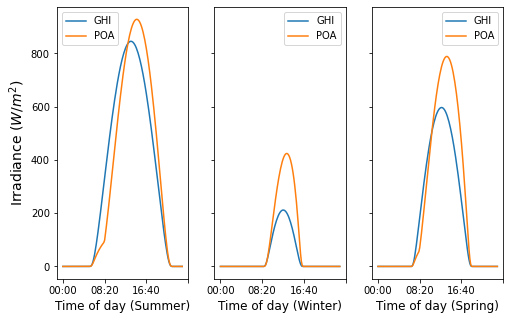

In [4]:
from pvlib import location
from pvlib import irradiance
import pandas as pd
from matplotlib import pyplot as plt

# For this example, we will be using Green Fablab, Kamp-Lintfort
tz = 'CET'
lat, lon = 51.497, 6.549

# Create location object to store lat, lon, timezone
site = location.Location(lat, lon, tz=tz)


# Calculate clear-sky GHI and transpose to plane of array
# Define a function so that we can re-use the sequence of operations with
# different locations
def get_irradiance(site_location, date, tilt, surface_azimuth):
    # Creates one day's worth of 10 min intervals
    times = pd.date_range(date, freq='10min', periods=6*24,
                          tz=site_location.tz)
    # Generate clearsky data using the Ineichen model, which is the default
    # The get_clearsky method returns a dataframe with values for GHI, DNI,
    # and DHI
    clearsky = site_location.get_clearsky(times)
    # Get solar azimuth and zenith to pass to the transposition function
    solar_position = site_location.get_solarposition(times=times)
    # Use the get_total_irradiance function to transpose the GHI to POA
    POA_irradiance = irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=surface_azimuth,
        dni=clearsky['dni'],
        ghi=clearsky['ghi'],
        dhi=clearsky['dhi'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'])
    # Return DataFrame with only GHI and POA
    return pd.DataFrame({'GHI': clearsky['ghi'],
                         'POA': POA_irradiance['poa_global']})


# Get irradiance data for summer and winter solstice, assuming 30 degree tilt
# and a south-west facing array
#https://www.timeanddate.com/calendar/seasons.html
summer_irradiance = get_irradiance(site, '06-20-2020', 30, 225)
winter_irradiance = get_irradiance(site, '12-21-2020', 30, 225)
spring_irradiance = get_irradiance(site, '20-03-2020', 30, 225)

# Convert Dataframe Indexes to Hour:Minute format to make plotting easier
summer_irradiance.index = summer_irradiance.index.strftime("%H:%M")
winter_irradiance.index = winter_irradiance.index.strftime("%H:%M")
spring_irradiance.index = spring_irradiance.index.strftime("%H:%M")

# Plot GHI vs. POA for winter, summer and spring
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(8,5))
summer_irradiance['GHI'].plot(ax=ax1, label='GHI')
summer_irradiance['POA'].plot(ax=ax1, label='POA')
winter_irradiance['GHI'].plot(ax=ax2, label='GHI')
winter_irradiance['POA'].plot(ax=ax2, label='POA')
spring_irradiance['GHI'].plot(ax=ax3, label='GHI')
spring_irradiance['POA'].plot(ax=ax3, label='POA')

ax1.set_xlabel('Time of day (Summer)', fontsize = 12)
ax2.set_xlabel('Time of day (Winter)', fontsize = 12)
ax3.set_xlabel('Time of day (Spring)', fontsize = 12)
ax1.set_ylabel('Irradiance ($W/m^2$)', fontsize = 14)
ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

POA irradiance is defined as the sum of the direct normal (DNI) and diffuse (DHI) irradiance components incident on a surface with a given tilt and angle of incidence. The POA curves are not asymmetric because in the morning and afternoon albedos present high variability in comparison to midday values probably due to shading. (Toledo, 4. Results and Discussion)<br>
According to the 2 graphs, the POA irradiance at 30 degrees angle is better little bit in summer, but the POA irrandiance at 60 degrees angle is way better in spring and winter.<br>

<br>

## 3.5 Plot the sun paths for Kamp-Lintfort

In the above example we just used three different days of the year but the sun path varies over the year (see [Sun Path](https://en.wikipedia.org/wiki/Sun_path) on Wikipedia). We discussed the sun path diagram in Physics 2. Start with [this code](https://pvlib-python.readthedocs.io/en/latest/auto_examples/plot_sunpath_diagrams.html) and adapt it accordingly.

1. Plot the sun paths for Kamp-Lintfort in polar as well as cartesian cordinates. Use the right time zone as well as geographical coordinates for Kamp-Lintfort. The polar plot and of the solar path will then show the time in UTC. 
1. What is the solar zenith angle at Kamp-Lintfort on summer solstice at 10:00 UTC? 
1. What is the 10:00 UTC in local time?
1. What is an analemma?

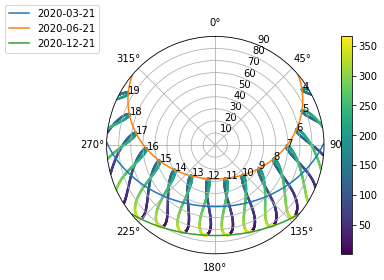

In [5]:
from pvlib import solarposition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tz = 'UTC'
lat, lon = 51.497, 6.549

times = pd.date_range('2020-01-01 00:00:00', '2021-01-01', closed='left',
                      freq='H', tz=tz)
solpos = solarposition.get_solarposition(times, lat, lon)
# remove nighttime
solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]

ax = plt.subplot(1, 1, 1, projection='polar')
# draw the analemma loops
points = ax.scatter(np.radians(solpos.azimuth), solpos.apparent_zenith,
                    s=2, label=None, c=solpos.index.dayofyear)
ax.figure.colorbar(points)

# draw hour labels
for hour in np.unique(solpos.index.hour):
    # choose label position by the smallest radius for each hour
    subset = solpos.loc[solpos.index.hour == hour, :]
    r = subset.apparent_zenith
    pos = solpos.loc[r.idxmin(), :]
    ax.text(np.radians(pos['azimuth']), pos['apparent_zenith'], str(hour))

# draw individual days
for date in pd.to_datetime(['2020-03-21', '2020-06-21', '2020-12-21']):
    times = pd.date_range(date, date+pd.Timedelta('24h'), freq='5min', tz=tz)
    solpos = solarposition.get_solarposition(times, lat, lon)
    solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]
    label = date.strftime('%Y-%m-%d')
    ax.plot(np.radians(solpos.azimuth), solpos.apparent_zenith, label=label)

ax.figure.legend(loc='upper left')

# change coordinates to be like a compass
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmax(90)

plt.show()

**What is the solar zenith angle at Kamp-Lintfort on summer solstice at 10:00 UTC?**

10am UTC = 12pm CET <br>
Zenith angle at 12pm in Kamp-Lintfort according to the figure = 35 degrees.<br>
But noon is almost at 12 o'clock UTC, at 14 o'clock CET with an angle of 30 degrees.

**What is the 10:00 UTC in local time?**

10:00 UTC is 12:00 CET

**What is an analemma?**

Analemma is a diagram showing the position of the Sun in the sky as seen from a fixed location on Earth at the same mean solar time, as that position varies over the course of a year. The diagram will resemble a figure eight. [2]

<br>

## 3.6 Spectral Response of PV cells ##

So far we have studied the solar irradiance on a horizontal plane (GHI) under the clear sky assumption as well as the transformation of the irradiance to the plane of the PV array (POA). Furthermore we have created an overview of the sun paths at Kamp-Lintfort for three different dates (summer and winter solstice as well as spring equinox). 

The analyses so far have not taken into account the solar spectral irradiance at sea level (e.g. AM 1.5). The wavelength dependence of the solar irradiance is paramount for the assessment of PV cell performance since the different semiconductor materials show partly very different wavelength dependent efficiencies (c.t. quantum efficiency). The wavelength dependent performance of a PV cell material (a specific semiconductor material) is expressed as the **spectral response SR**. It describes how well light of a certain wavelength is absorbed and transformed into charge pairs (electron-hole-pairs in the P-N-junction of the semiconductor). The unit of $\mathrm{SR}$ is $\mathrm{A/W}$, i.e Ampère per Watt, or Colomb per second per Watt. This is the number of electrons (expressed in Coulomb) per Watt of incident radiation.
(See [**PVPMC**](https://pvpmc.sandia.gov/modeling-steps/2-dc-module-iv/effective-irradiance/spectral-response/) and [**PV Education**](https://www.pveducation.org/pvcdrom/solar-cell-operation/spectral-response)). 

To get the yield of a PV material you have to multiply the spectral response $\mathrm{SR}$ with the spectral irradiance $e_\lambda$ in $\mathrm{\frac{W}{m^2 nm}}$ and integrate it over wavelength $\lambda$. 

The unit of the integral will become $\mathrm{\frac{A}{W} \cdot \frac{W}{m^2 nm} \cdot nm = \frac{A}{m^2}}$. This is the electrical current (short circuit current) provided by 1 m² of the chosen PV cell material. <br> (To get the power $P = IV$ of the module you have to know the open circuit voltage, too, but we neglect it here).

The total current per unit area of the selected PV cell matrial yields: 

$$ J = \int_0^\infty \mathrm{SR}\cdot e_\lambda(\lambda) d\lambda $$


### 3.6.1 Spectral irradiance, reference defined by ASTM G-173.

Get $e_\lambda$ from the listed reference irradiance spectra for AM1.5 defined in the standard [**ASTM G-173**](https://www.nrel.gov/grid/solar-resource/spectra-am1.5.html). Use the reference spectrum "Global Tilt". The earlier mentioned web site says: "The receiving surface is defined in the standards as an inclined plane at 37° tilt toward the equator, facing the sun (i.e., the surface normal points to the sun, at an elevation of 41.81° above the horizon)."

In one of the SciProg exercises we learnt how to read the CSV file with the ASTM G-173 reference sprectra into a pandas array (or numpy array).

### 3.6.2 Spectral response

The spectral response for different materials is given in the following diagram. 

<img src="./images/Spectral_Response_PV.jpg" width=500 />

_Fig.: Spectral response of different semiconductor materials and solid state phases (amorphous, crystalline, etc)._ <br>
Source: [Sandia PVPMC](https://pvpmc.sandia.gov/modeling-steps/2-dc-module-iv/effective-irradiance/spectral-response/)

#### Task: Digitize the SR curve for the most effective crystalline silicon (c-Si). ####

This exercise is a training to digitize curves which we just have diagrams from. The idea is to generate a matplotlib plot with the picture in the background of the plotting area and to plot self-made curves on top of it to gain a rough piecewise linear approximation of the respective curve on the background picture.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

**Extent the following arrays for the linear approximation.**

The numpy arrays contain the manual sampling of the c-Si curve. The points are added with trial and error by means of the diagram below. Samping points between 500 nm and 1200 nm are missing. Add them to complete the approximation of the black curve on the background image with the fat yellow curve on top of it. 

For technical reasons the spectral response is multiplied by 1000 to be displayed correctly in the diagram (SR_1000). Later you have to devide it by 1000 to get the spectral response (somewhere between 0 and 1 A/W). 

In [7]:
# Complete the following two arrays. 
lam_SR_nm  = np.array([0, 250, 300, 350, 500, 600, 700, 800, 920, 1000, 1050, 1090, 1180, 1200, 5000]) # wavelength in nm
SR_1000 = np.array([0, 0, 70, 120, 380, 470, 550, 620, 700, 680, 550, 340,0, 0, 0]) # Spectral response in mA/W

SR = SR_1000 / 1000. # SR in A/W
SR

array([0.  , 0.  , 0.07, 0.12, 0.38, 0.47, 0.55, 0.62, 0.7 , 0.68, 0.55,
       0.34, 0.  , 0.  , 0.  ])

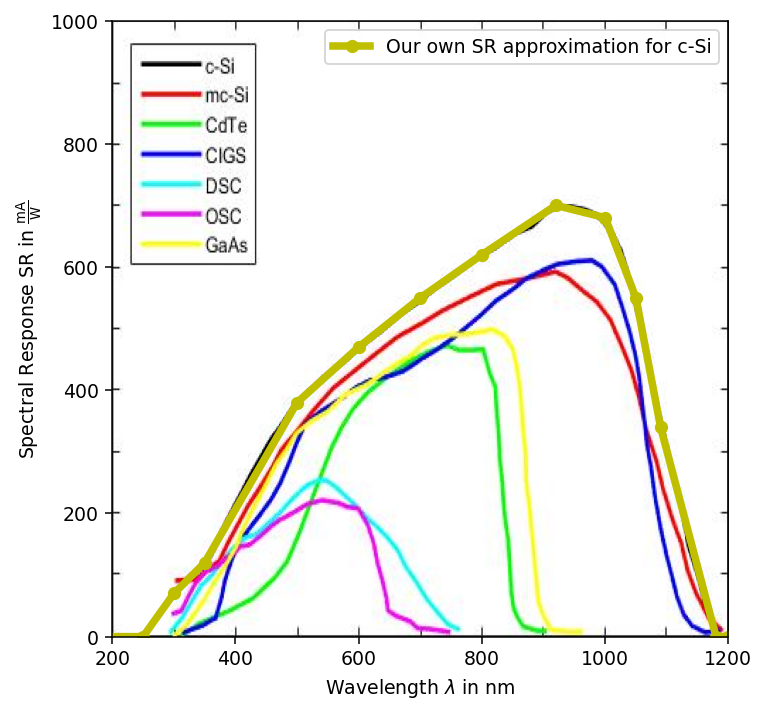

In [8]:
img = plt.imread("images/background.png")
fig, ax = plt.subplots(figsize=(6,6), dpi = 136)
ax.imshow(img, extent = [200, 1200, 0, 1000])
ax.set_xlim(200, 1200)
ax.plot(lam_SR_nm, SR_1000, "yo-", linewidth = 4, label = r"Our own SR approximation for c-Si")
ax.set_xlabel(r"Wavelength $\lambda$ in nm")
ax.set_ylabel(r"Spectral Response SR in $\mathrm{\frac{mA}{W}}$")
ax.legend()
plt.show()

**Linear interpolation of the SR curve.**

To be able to multiply $e_\lambda$ and $\mathrm{SR}$ both arrays have to share the same wavelength vector which is defined through the ASTM G-173 data. 

The easiest way is to linearly interpolate the $\mathrm{SR}$ approximation and to evaluate it at the respective wavelength vector. 

Use `numpy.interp(x, xp, fp, left=None, right=None, period=None)`. <br>See https://numpy.org/doc/stable/reference/generated/numpy.interp.html

Example (shows the unacceptable linearly falling segment between 500 and 1200 nm because of insufficient sampling):

In [9]:
lam_new_nm = np.arange(0, 1500.01, 50)
SR_new = np.interp(lam_new_nm, lam_SR_nm, SR, left=None, right=None, period=None)

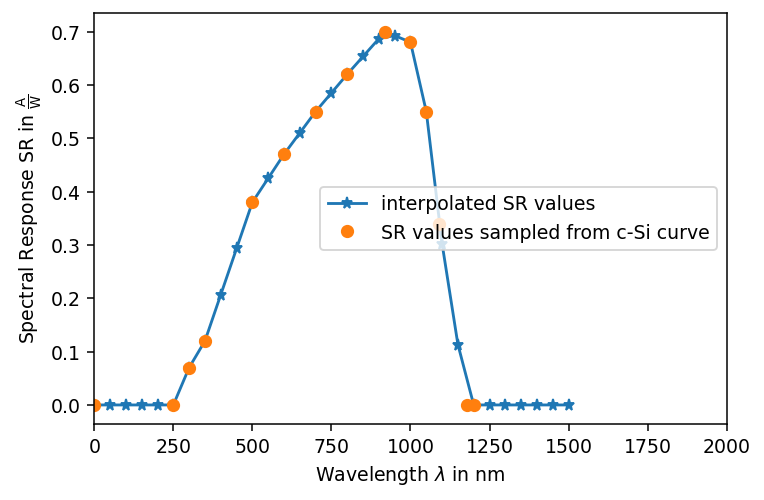

In [10]:
fig2, ax2 = plt.subplots(figsize=(6,4), dpi = 136)
ax2.set_xlabel(r"Wavelength $\lambda$ in nm")
ax2.set_ylabel(r"Spectral Response SR in $\mathrm{\frac{A}{W}}$")
ax2.plot(lam_new_nm, SR_new, "*-", label = "interpolated SR values")
ax2.plot(lam_SR_nm, SR, "o", label = "SR values sampled from c-Si curve")
ax2.legend()
ax2.set_xlim([0, 2000])
plt.show()

### 3.6.3 Determine the total current per squaremeter of a c-Si PV cell  

As stated earlier the total current per unit area of the selected PV cell material is yielded from: 

$$ J = \int_0^\infty \mathrm{SR}\cdot e_\lambda(\lambda) d\lambda $$

Read $e_\lambda$ from the ASTM G-173 data, use its wavelength column to resample (interpolate) $\mathrm{SR}$.<br>Multiply the two arrays and integrate them using your own trapezoid rule for listed values! What is $J$?

In [11]:
df_ASTM = pd.read_csv(r'data/astmg173.csv', skiprows=[0])
df_ASTM

,Wvlgth-nm,Etr-W*m-2*nm-1,Global-tilt-W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
0,280.0,0.08200,4.730000e-23,2.540000e-26
1,280.5,0.09900,1.230000e-21,1.090000e-24
2,281.0,0.15000,5.690000e-21,6.130000e-24
3,281.5,0.21200,1.570000e-19,2.750000e-22
4,282.0,0.26700,1.190000e-18,2.830000e-21
...,...,...,...,...
1997,3980.0,0.00884,7.390000e-03,7.400000e-03
1998,3985.0,0.00880,7.430000e-03,7.450000e-03
1999,3990.0,0.00878,7.370000e-03,7.390000e-03
2000,3995.0,0.00870,7.210000e-03,7.230000e-03


In [14]:
df_ASTM_w = df_ASTM['Wvlgth-nm']
print(df_ASTM_w)

0        280.0
1        280.5
2        281.0
3        281.5
4        282.0
         ...  
1997    3980.0
1998    3985.0
1999    3990.0
2000    3995.0
2001    4000.0
Name: Wvlgth-nm, Length: 2002, dtype: float64


In [15]:
df_ASTM_w = np.arange(0, 4500.01, 10)
SR_1 = np.interp(df_ASTM_w, lam_SR_nm, SR, left=None, right=None, period=None)

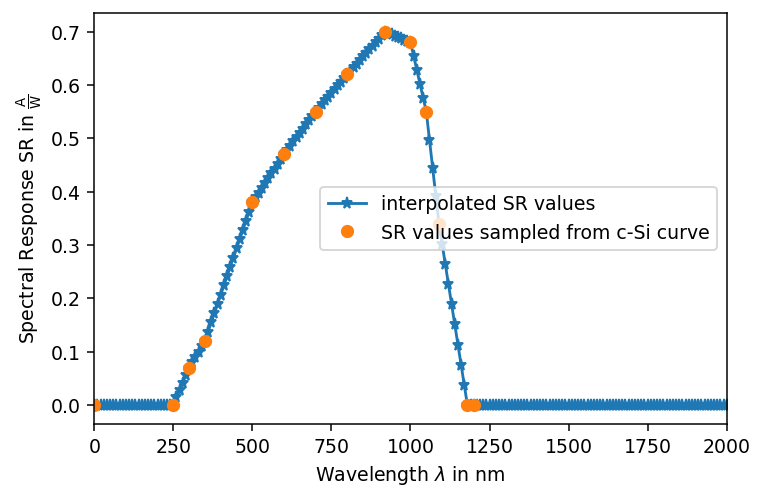

In [16]:
fig3, ax3 = plt.subplots(figsize=(6,4), dpi = 136)
ax3.set_xlabel(r"Wavelength $\lambda$ in nm")
ax3.set_ylabel(r"Spectral Response SR in $\mathrm{\frac{A}{W}}$")
ax3.plot(df_ASTM_w, SR_1, "*-", label = "interpolated SR values")
ax3.plot(lam_SR_nm, SR, "o", label = "SR values sampled from c-Si curve")
ax3.legend()
ax3.set_xlim([0, 2000])
plt.show()

In [17]:
df_ASTM_w1 = df_ASTM['Wvlgth-nm']
df_ASTM_g = df_ASTM['Global-tilt-W*m-2*nm-1']

In [18]:
j = df_ASTM_w1*df_ASTM_g

In [20]:
import scipy.integrate as spi

spi.trapz (j) #W/m^-2

773584.9698322803

**References:**<br>
1- Toledo, Carlos & Gracia Amillo, Ana & Bardizza, Giorgio & Abad, Jose & Urbina, Antonio. (2020). Evaluation of Solar Radiation Transposition Models for Passive Energy Management and Building Integrated Photovoltaics. Energies. 13. 702. 10.3390/en13030702.<br>
2- https://en.wikipedia.org/wiki/Analemma